# Próbkowanie Gibbsa

In [1]:
import random,math
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import matplotlib.pyplot as plt 
import scipy.stats as stats

# Zadanie


Wylosuj próbkę z rozkładu 

$$
X \sim N(0,\Sigma), \qquad 
\Sigma = \begin{bmatrix}
1 & \rho\\
\rho & 1 
\end{bmatrix}.
$$

za pomocą próbkowanie Gibbsa wiedząc, że

$$
p(x_1|x_2) \sim N(\rho x_1, [1-\rho^2]) 
$$

oraz

$$
p(x_2|x_1) \sim N(\rho x_2, [1-\rho^2])
$$

są to rozkłady warunkowe.

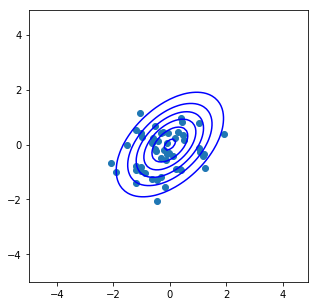

In [5]:
N = 50
thin = 100

rho = 0.5
cov = [[1, rho], [rho, 1]]
mean = np.array([0, 0])

theta_1 = 0
theta_2 = 0
x = [] 
y = []
for i in range(N):
    for j in range(thin):
        theta_1 = stats.norm(loc=rho*theta_2, scale=1-rho*rho).rvs(1)[0]
        theta_2 = stats.norm(loc=rho*theta_1, scale=1-rho*rho).rvs(1)[0]
    x.append(theta_1), y.append(theta_2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
x_plot, y_plot = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x_plot.shape + (2,))
pos[:, :, 0] = x_plot
pos[:, :, 1] = y_plot
ax.contour(x_plot, y_plot, stats.multivariate_normal(mean,cov).pdf(pos), 6, colors = 'b')
ax.scatter(x, y)
plt.show()